In [458]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score

In [459]:
df = pd.read_csv("csv/gameandgrade.csv")

In [460]:
df.head()

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade
0,0,1,1,2,1,1,4,4,5,77.50
1,1,1,1,3,1,1,1,3,3,83.00
2,0,1,0,0,0,0,1,3,3,80.00
3,0,1,3,5,1,1,2,2,3,45.00
4,1,1,1,1,2,1,1,3,4,85.00


In [461]:
df['Grade'] = pd.to_numeric(df['Grade'], errors='coerce')

In [462]:
df.dropna(inplace=True)

In [463]:
df = df[~df.duplicated()]

In [464]:
df.isnull().sum()

Sex                 0
School Code         0
Playing Years       0
Playing Often       0
Playing Hours       0
Playing Games       0
Parent Revenue      0
Father Education    0
Mother Education    0
Grade               0
dtype: int64

In [465]:
df.duplicated().sum()

np.int64(0)

In [466]:
X_multiple = df[["Playing Years", "Playing Often", "Playing Hours", "Playing Games", "Parent Revenue", "Father Education", "Mother Education"]]
Y = df["Grade"]

In [467]:
X_train_multi, X_test_multi, Y_train_multi, Y_test_multi = train_test_split(X_multiple, Y, test_size=0.2, random_state=42)

In [468]:
print("Training Set:")
print(X_train_multi)
print(Y_train_multi)

print("\nTesting Set:")
print(X_test_multi)
print(Y_test_multi)

Training Set:
     Playing Years  Playing Often  Playing Hours  Playing Games  \
593              2              4              3              1   
131              1              2              1              1   
44               4              1              3              1   
70               0              0              0              0   
588              2              3              2              1   
..             ...            ...            ...            ...   
71               1              3              2              1   
106              0              0              0              0   
270              0              0              0              0   
439              1              5              2              1   
102              1              3              1              1   

     Parent Revenue  Father Education  Mother Education  
593               2                 4                 3  
131               1                 4                 4  
44     

In [469]:
model_multiple = LinearRegression()
model_multiple.fit(X_train_multi, Y_train_multi)

LinearRegression()

In [470]:
print(f"Intercept (b): {model_multiple.intercept_:.2f}")
print("Coefficients:")
for i, col in enumerate(X_multiple.columns):
    print(f"- {col}: {model_multiple.coef_[i]:6f}")

Intercept (b): 62.36
Coefficients:
- Playing Years: 0.580770
- Playing Often: 1.888650
- Playing Hours: -0.343090
- Playing Games: -10.525991
- Parent Revenue: -0.779165
- Father Education: 2.210562
- Mother Education: 3.246068


In [471]:
Y_pred_multiple = model_multiple.predict(X_test_multi)

In [472]:
mse_multiple = mean_squared_error(Y_test_multi, Y_pred_multiple)
r2_multiple = r2_score(Y_test_multi, Y_pred_multiple)

In [473]:
print(f"Mean Squared Error (MSE): {mse_multiple:.2f}")
print(f"R² Score: {r2_multiple:.2f}")

Mean Squared Error (MSE): 219.52
R² Score: 0.26


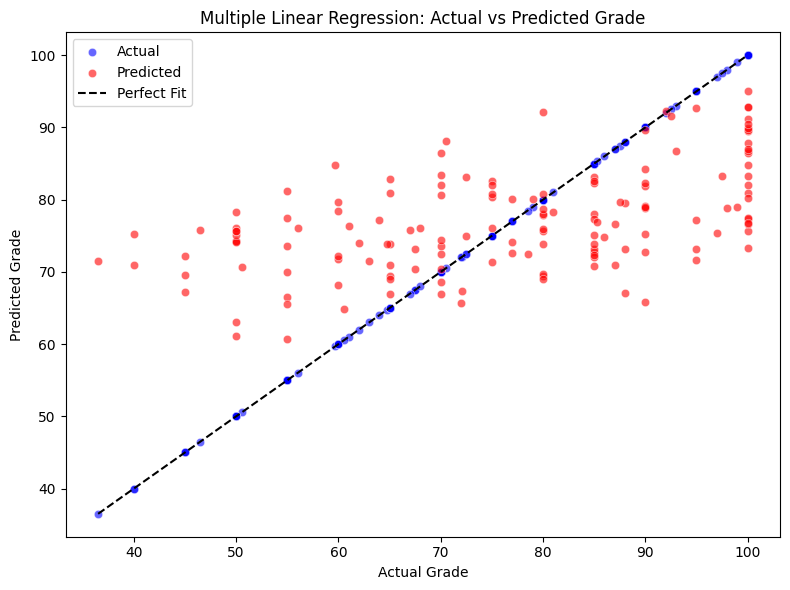

In [ ]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=Y_test_multi.values.flatten(), y=Y_test_multi.values.flatten(), color="blue", label="Actual", alpha=0.6)
sns.scatterplot(x=Y_test_multi.values.flatten(), y=Y_pred_multiple.flatten(), color="red", label="Predicted", alpha=0.6)

plt.plot([Y_test_multi.min(), Y_test_multi.max()], [Y_test_multi.min(), Y_test_multi.max()], color="black", linestyle="--", label="Perfect Fit")

plt.xlabel("Actual Grade")
plt.ylabel("Predicted Grade")
plt.title("Multiple Linear Regression: Actual vs Predicted Values")
plt.legend()
plt.tight_layout()
plt.show()

In [475]:
coefficients = pd.DataFrame(model_multiple.coef_, X_multiple.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by="Coefficient", ascending=False)
print(coefficients)

                  Coefficient
Mother Education     3.246068
Father Education     2.210562
Playing Often        1.888650
Playing Years        0.580770
Playing Hours       -0.343090
Parent Revenue      -0.779165
Playing Games      -10.525991


In [476]:
r2_train = r2_score(Y_train_multi, model_multiple.predict(X_train_multi))
r2_test = r2_score(Y_test_multi, Y_pred_multiple)

print(f"R² Score on Training Data: {r2_train:.4f}")
print(f"R² Score on Test Data: {r2_test:.4f}")

R² Score on Training Data: 0.1552
R² Score on Test Data: 0.2557
